# Glassdoor Company Review Analysis - Part 2 Sentiment Analysis


### Introduction
This is part 2 of the Glassdoor company review analysis project. In this section, we are focused on sentiment analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df_cleaned = pd.read_csv('df_cleaned1.csv')
df_cleaned.head(2)

,Comment Datetime,State,Job Title,Tenure,Current Employee,Full-time,Summary,Pro,Con,Recommended,Positive Outlook,Approves of CEO,Overall Rating,Career Opportunities,Compensation and Benefits,Work/Life Balance,Senior Management,Culture & Values
0,2008-06-11,MA,Director,NaN,1,NaN,"""very political""",privately owned company that can look at long ...,risk averse management that does not know how ...,-1,0,0,2.0,2.0,2.5,3.5,2.5,NaN
1,2008-06-11,MA,Vice President,NaN,0,NaN,"""Great Brand-Name But Caveat Emptor""",Industry leader in many ways with one of the b...,"A lot of uncertainty from the top down, and mo...",0,0,0,3.0,4.0,3.5,1.0,1.5,NaN


## Sentiment Analysis

### Sentiment Analysis with TextBlob

Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to focus on these 2). A corpus' sentiment is the average of these 2 labels.
* Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
* Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

#### Sentiment of `Summary` Column

In [3]:
# sentiment analysis on column 'Summary'

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_cleaned['S_Polarity'] = df_cleaned['Summary'].apply(pol)
df_cleaned['S_Subjectivity'] = df_cleaned['Summary'].apply(sub)

df_cleaned[['Summary','S_Polarity','S_Subjectivity']]

,Summary,S_Polarity,S_Subjectivity
0,"""very political""",0.0,0.130
1,"""Great Brand-Name But Caveat Emptor""",0.8,0.750
2,"""Great place to work if you are not out all fo...",0.8,0.750
3,"""Anonymous - the good and not so good""",0.7,0.600
4,"""Why wouldn't you want to work here?""",0.0,0.000
...,...,...,...
6381,"""Great company to work with""",0.8,0.750
6382,"""Great place to work""",0.8,0.750
6383,"""WORST HR People & Culture""",-1.0,1.000
6384,"""Great people with confused management""",0.2,0.725


Look at row 6383. Textblob captured this strongly negative message and assigned polarity as -1. Row 6384 starts with a positive word but followed with negative word 'confused management', Textblob also captured this sentiment correctly.

In [4]:
df_cleaned.loc[6383,'Comment Datetime']

print(df_cleaned.loc[6383,'Con'])

- HR are totally non-technical and have no Business knowledge

- Most of the HR team members are very dumb from top to bottom... 

- They are very biased in nature

- HR teams only make noises at social media about fidelity culture, gender diversity and innovation culture but the fact is they are dumb and don;t really understand any of this...

- HR policies are only on paper and nothing get really practiced...


In [5]:
# define a fuction to plot polarity and subjectivity

def plot_polarity_subjectivity(pol,sub, column):
    ax,figure = plt.subplots(figsize=(10,8))
    plt.scatter(x=pol,y=sub, data=df_cleaned,c=pol)
    plt.vlines(x=0, ymin=0, ymax=1, linestyles='dashed',colors='r')
    plt.title(f'{column} Polarity vs.Subjectivity', fontsize=20)
    plt.xlabel('Polarity',fontsize=15)
    plt.ylabel('Subjectivity',fontsize=15)
    plt.xticks([-1.00,0,1.00],['Negative','Neutral','Postive'])
    plt.show()

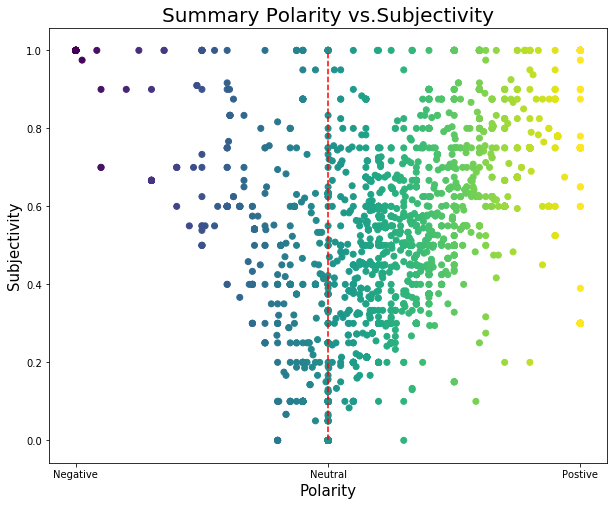

In [6]:
# plot the summary polarity and subjectivity

plot_polarity_subjectivity(pol='S_Polarity',sub='S_Subjectivity', column='Summary')

**Findings:**

* It is clear that there are more positive comments than negative as we see more data points on the right side of the red vertical line. This verified what we have observed from the precious EDA. 
* The more polarized the comment is (either positive or negative), the more subjective it is. 
* We also notice that reviewers who give positive comments based more on facts (lower subjectivity) and reviewers who give negative comments based more on opinion.

#### Plot Most Frequent 10 Job Titles' Sentiment in `Summary`

In [7]:
most_10_job = df_cleaned['Job Title'].value_counts().nlargest(10)
most_10_job

Anonymous Employee                   1578
Unknown Title                         980
Software Engineer                     309
Financial Representative              227
Director                              127
Vice President                        109
Project Manager                        93
Financial Services Representative      91
Manager                                81
Business Analyst                       81
Name: Job Title, dtype: int64

**Additional Data Cleaning**

Notice there are 'Financial Representative' and 'Financial Services Representative', 'Software Engineer' and 'Software Engineer/Developer'. Based on business knowledge, we assume these are the variants of the same job. Therefore, we are going to do additional cleaning by combining these 2 titles into 1.

In [8]:
# combine the 2 job titles into 1
df_cleaned['Job Title'] = df_cleaned['Job Title'].str.replace('Financial Services Representative', 'Financial Representative')
df_cleaned['Job Title'] = df_cleaned['Job Title'].str.replace('Software Engineer/Developer', 'Software Engineer')

# get the most frequent 10 job titles
most_10_job_list= df_cleaned['Job Title'].value_counts().nlargest(10).index.to_list()

# get the mean polarity and mean subjectivity of reviewers with the most frequent 10 job titles
sent_by_job = df_cleaned.groupby('Job Title')["S_Polarity", "S_Subjectivity"].mean()

# subset the polarity and subjectivity of the most frequent 10 job titles
sent_by_most10_job = sent_by_job.loc[most_10_job_list]

sent_by_most10_job

c:\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


,S_Polarity,S_Subjectivity
Job Title,,
Anonymous Employee,0.263195,0.303966
Unknown Title,0.299251,0.356895
Software Engineer,0.363015,0.427079
Financial Representative,0.257664,0.376497
Director,0.302742,0.415075
Vice President,0.301023,0.452968
Project Manager,0.279923,0.395345
Manager,0.341555,0.422964
Business Analyst,0.340373,0.386558


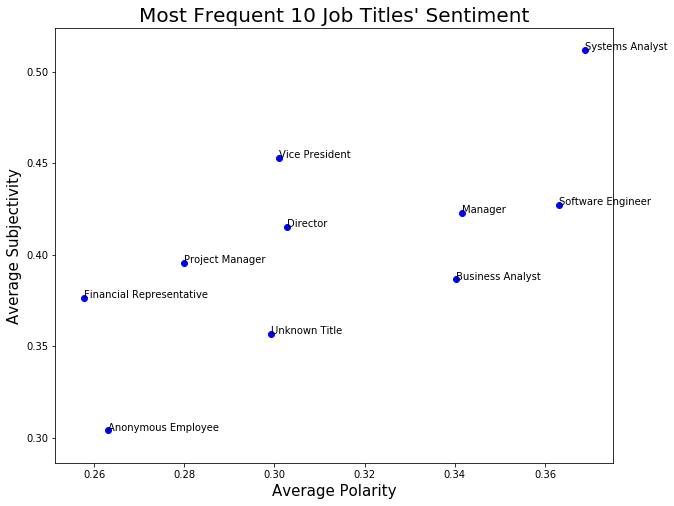

In [9]:
# plot the polarity and subjectivity of the most frequent 10 job titles

plt.rcParams['figure.figsize'] = [10, 8]

for i in sent_by_most10_job.index:
    x = sent_by_most10_job.loc[i,'S_Polarity']
    y = sent_by_most10_job.loc[i,'S_Subjectivity']
    plt.scatter(x, y, color='blue')
    plt.text(x, y, i, fontsize=10)

plt.title("Most Frequent 10 Job Titles' Sentiment", fontsize=20)
plt.xlabel('Average Polarity', fontsize=15)
plt.ylabel('Average Subjectivity', fontsize=15)

plt.show()

**Findings**:

* Financial Representatives, Project Managers and reviewers who do not disclose their titles (Anonymous Employee) tend to give the most negative comments in 'Summary'. In the next section (keywords extraction and topic modeling), we will dive into these groups and see what makes them unhappy.
* System Analysts and Software Engineers have the most positive comments.

Next, let's explore the sentiment of column `Pro` and column `Con`.

#### Sentiment of `Pro` and `Con` Columns

In [10]:
# sentiment analysis on column 'Pro' and column 'Con'

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_cleaned['P_Polarity'] = df_cleaned['Pro'].apply(pol)
df_cleaned['P_Subjectivity'] = df_cleaned['Pro'].apply(sub)

df_cleaned['C_Polarity'] = df_cleaned['Con'].apply(pol)
df_cleaned['C_Subjectivity'] = df_cleaned['Con'].apply(sub)

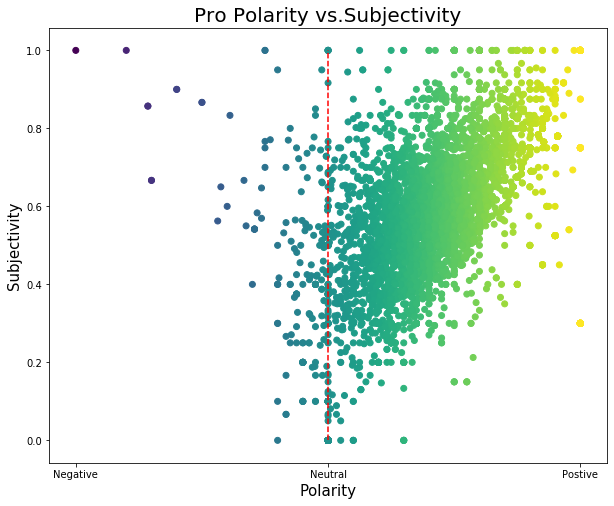

In [11]:
plot_polarity_subjectivity(pol='P_Polarity',sub='P_Subjectivity',column='Pro')

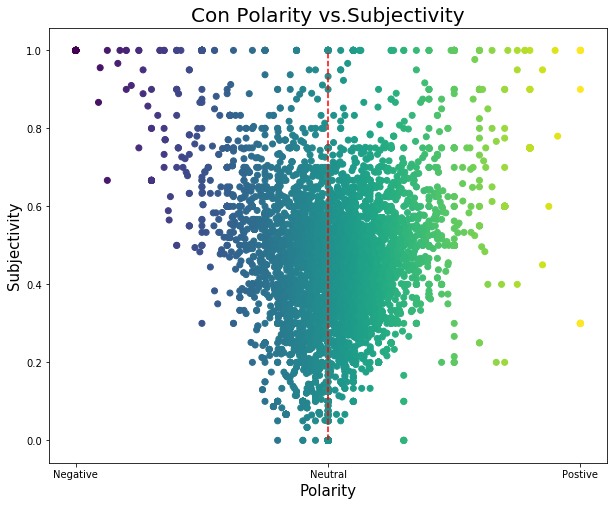

In [12]:
plot_polarity_subjectivity(pol='C_Polarity',sub='C_Subjectivity',column='Con')

**Findings:**
 - It is not surprising to see the polarity of `Pro` mostly falls in the positive part because we know these are the nice things employees say about this company. 
 - It is surprising to see even in the `Con` column, half of the data points' polarity falls on the positive side. This is strong evidence that most employees love this company and they don't have many complaints.

In [13]:
df_cleaned.to_csv('df_cleaned2.csv')

Next, in Part 3, we are going to extract keywords and preform topic modeling.